# Exercise 4.2.3 Logistic Regression, ROC curve, Confusion Matrix

The Accuracy measurement must be used very carefuly when the classes are imbalanced.

There are other measurements called Sensitivity (Se) and Specificity (Sp):
$$S_e = \frac{TP}{TP+FN}$$,  $$  S_p = \frac{TN}{TN+FP}$$

The AUC (area under curve) of the ROC (receiving operating curve) Curve is a probability curve that represents the measure of separability. If it is near to 1, it has a good measure of separability.

The Confusion matrix is a table that is often used to describe the performance of a classification model.

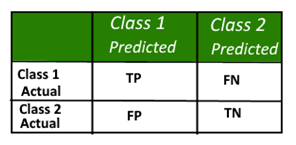

## 1. Load Dataset: Haberman's Survival

The dataset used for this exercise can be downloaded from: https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

What is this dataset about?

Load dataset to obtain the X and Y matrices. 

In [63]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [64]:
#1. Load dataset
data = pd.read_csv('haberman.data', header = None)
data.head()

dataset = np.array(data)
m, n = np.shape(dataset)
print('Rows:', m, 'Columns:', n)

x = dataset[:, 0:3]
y = dataset[:, -1]
y = y.reshape(-1, 1)
print('x:', np.shape(x))
print('y:', np.shape(y))

#Change outputs
y = np.where(y==1, 0, y)
y = np.where(y==2, 1, y)


Rows: 306 Columns: 4
x: (306, 3)
y: (306, 1)


In [65]:
#Normalize
def normalize(x):
    x_norm = (x - np.mean(x, axis=0)) / np.std(x,axis=0)
    return x_norm

X_norm = normalize(x)


## 2. Prepare data

This step requires to add Bias, and then split dataset. We will define the Bias function to add the intercept column to the features matrix (input).

For spliting dataset we will use the train_test_split() function. Be sure to import the function before use it.

In [66]:
#2. Prepare data: add Bias and split dataset

print(np.shape(X_norm))

def Bias(X):
    ones = np.ones((len(X),1))
    X1 = np.concatenate((ones, X), axis=1)
    return X1

x = Bias(X_norm)

print('x shape: ', np.shape(x))

test_size = 0.2
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size)
print('Split X', len(x), 'rows into train with', len(xTrain), 'and test with', len(xTest))
print('Split Y', len(y), 'rows into train with', len(yTrain), 'and test with', len(yTest))

yTrain = yTrain.reshape(-1,1)
yTest = yTest.reshape(-1,1)

print('xTrain shape:',np.shape(xTrain), 'yTrain shape:', np.shape(yTrain))
print('xTest shape:', np.shape(xTest), 'yTest shape:', np.shape(yTest))


(306, 3)
x shape:  (306, 4)
Split X 306 rows into train with 244 and test with 62
Split Y 306 rows into train with 244 and test with 62
xTrain shape: (244, 4) yTrain shape: (244, 1)
xTest shape: (62, 4) yTest shape: (62, 1)


## 3. Gradient Descent algorithm

As we learnt from previous lesson, the Gradient Descent (GD) consists in two main steps:

1. Calculate the gradient
2. Update the W values

We will add the cost calculation to evaluate the algorithm performance and W convergence.

The LoR algorithm will be implemented using the number of iterarions as the while condition ends.

We will define four functios to implement the GD algorithm:

1. Logistic: h(  )
2. Cost: cost(  )
3. Gradient: grad(  ) 
4. Gradient Descent: GD(  )

### 3.1 Logistic function 

The logistic function is implemented using the formula:
$$h(w, x) = \frac{1}{1+e^{-w^Tx}}$$


In [67]:
#3.1 Logistic function
def h(x, w):
    wx = np.dot(x, w.T)
    z = 1 / (1 + np.exp(-wx))
    return z

### 3.2 Cost function

The cost function is defined by: 

$$
J(w) = -\frac{1}{m}\left(\sum_{i=1}^{m}y_i\ log[h(x_i, w)] + (1 - y_i)\ log[1 - h(x_i, w)] \right)
$$

In [68]:
#3.2 Cost function
def cost(x, y, w):
    m, n = np.shape(x)
    c = (-1 / m)*np.sum(y * np.log(h(x, w)) + (1 - y) * np.log((1 - h(x, w))))
    return c


### 3.3 Gradient function

The gradient function is defined by:

$$
\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h(x_i, w) - y_i) x_i[j] 
$$

The gradient for the vector form is: 


$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{1}{m} X^T(h(X, w) - y) 
$$


In [69]:
#3.3 Gradient function
def grad(x, y, w):
    m, n = np.shape(x)
    g = (1 / m) * np.dot(x.T,(h(x, w)-y))
    return g

### 3.4 Gradient Descent function

The GD function will be define with the next steps.

1. Initialize variables: it, costo, and J
2. While the actual iteration (it) is less than iterations:
    - Calculate the gradient
    - Calculate the cost
    - Update W
    - Store the cost in J
3. The GD function will return the W vector and J

In [70]:
# 3.4 Gradient Descent function
def gd(x, y, w, alpha = 0.001, its = 1000):
    it = 0
    costo = 0
    J = {}
    while it < its:
        # Gradient
        gradiente = grad(x, y, w)
            
        #Cost function
        costo = cost(x, y, w)
            
        #Updating w
        w = w - alpha * gradiente.T
                
        #Storing cost
        J[it] = costo
   
        it += 1
              
    return w, J

## Testing the Gradient Descent 

Initial Cost (training data): 0.6931471805599454
Cost after training (training data): 0.5215758431519468
Cost after training (testing data): 0.6005818895419948
W: [[-1.17018886  0.15054982 -0.04035189  0.63841532]]


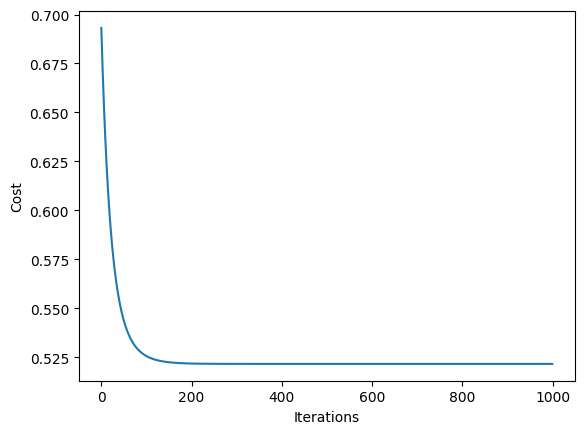

In [71]:
# Test the gradient descent
alpha = 0.1
its = 1000

m, n = np.shape(x)
w = np.zeros((1, n))

print('Initial Cost (training data):', cost(xTrain, yTrain, w))

#Gradient
w, J = gd(xTrain, yTrain, w, alpha, its)

print('Cost after training (training data):', cost(xTrain, yTrain, w))
print('Cost after training (testing data):', cost(xTest, yTest, w))

print('W:',w)

#Plot the cost over the iterations
plt.plot(J.keys(), J.values())
plt.xlabel('Iterations')
plt.ylabel('Cost');

## 4. Performance Measurement

### 4.1 Accuracy

The accuracy for LoR is defined by:

$$ Acc = \frac{TP + TN}{m} $$


In [72]:
# 4.1 Accuracy

def accuracy(x, y, w):

    Ynew = list(map(lambda x: 1 if x >= 0.5 else 0, h(x, w)))

    Ynew = np.array(Ynew)
    Ynew = Ynew.reshape(-1, 1)
    suma = (y == Ynew).sum()

    a = suma/len(y)

    return a, suma


accTrain, tptnTrain = accuracy(xTrain, yTrain, w)
accTest, tptnTest = accuracy(xTest, yTest, w)
print('Training accuracy:', accTrain, tptnTrain, 'out of', len(yTrain))
print('Testing accuracy:', accTest, tptnTest, 'out of', len(yTest))


Training accuracy: 0.7540983606557377 184 out of 244
Testing accuracy: 0.7096774193548387 44 out of 62


### 4.2 Sensitivity and Specificity (FPR and TPR)

Sensitivity (Recall, true positive rate (TPR): $$ TPR = \frac{TP}{TP + FN} $$
Specificity: $$ S_p = \frac{TN}{TN + FP} $$
False positive rate (FPR, 1 - Specificity): $$ FPR = \frac{FP}{FP + TN} $$

In [73]:
# 4.2 Obtain TPR and FPR

# a) Define the prediction function for a variable threshold
def predict(p, threshold):
    y_hat = list(map(lambda x: 1 if x >= threshold else 0, p))
    return y_hat

# b) Define the values function, where you can count the tp, tn, fp, and fn


def values(y, pred):

    # YOURCODE
    tp = tn = fn = fp = 0
    for i in range(len(y)):
        if y[i]:
            if y[i] == pred[i]:
                tp += 1
            else:
                fn += 1
        else:
            if y[i] == pred[i]:
                tn += 1
            else:
                fp += 1

    V = {'TP': tp, 'TN': tn, 'FN': fn, 'FP': fp}
    return V

# c) Define the TPR function


def tpr(V):

    tpr = V["TP"] / (V["TP"] + V["FN"])

    return tpr

# d) Define the FPR function


def fpr(V):

    fpr = V["FP"] / (V["FP"] + V['TN'])

    return fpr


# Test your functions
pred = predict(h(x, w), 0.5)
Val = values(yTrain, pred)
print('Prediction shape: ', np.shape(pred))
print('Values: ', Val)

print('Sensitivity (TPR): %.2F' %
      tpr(Val), 'portion were correctly classified as TP')
print('FPR: %.2F' % fpr(Val), 'portion were classified as FP')


Prediction shape:  (306,)
Values:  {'TP': 6, 'TN': 172, 'FN': 54, 'FP': 12}
Sensitivity (TPR): 0.10 portion were correctly classified as TP
FPR: 0.07 portion were classified as FP


### 4.3 ROC Curve


The ROC Curve is calculated using the TPR (True Positive Rate) or Sensitivity and FPR (False Positive Rate) or (1 - Specificity).

In order to obtain different values of TPR and FPR, it is important to calculate them with different thresholds in the prediction. In this case we will calculate TPR and FPR with ten different thresholds, from 0.0 to 1.0, with a step of 0.005.

So the prediction must obtain different values of the output with different thresholds.

Text(0.5, 1.0, 'Receiver Operating Characteristic')

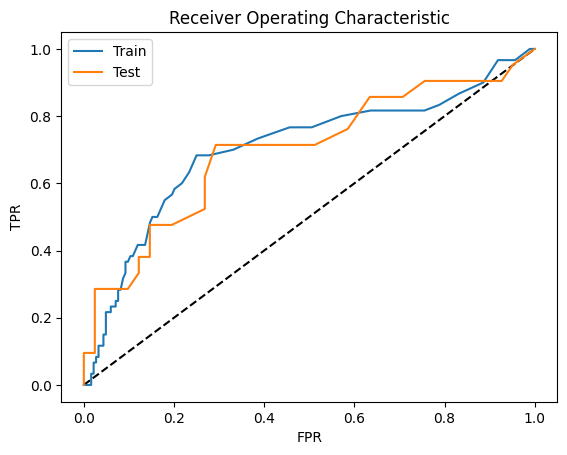

In [74]:
def ROC(y, p):

    # YOURCODE
    threshold = np.arange(0, 1, 0.005)
    TPR = np.zeros(len(threshold))
    FPR = np.zeros(len(threshold))

    for thr in range(len(threshold)):
        pred = predict(p, threshold[thr])
        TPR[thr] = tpr(values(y, pred))
        FPR[thr] = fpr(values(y, pred))

    return TPR, FPR


# ROC curve for Training
Tpr, Fpr = ROC(yTrain, h(xTrain, w))
plt.plot([0, 1], [0, 1], 'k--',)
plt.plot(Fpr, Tpr, '-', label="Train")

# ROC curve for Testing
Tpr1, Fpr1 = ROC(yTest, h(xTest, w))
plt.plot(Fpr1, Tpr1, '-', label="Test")

# Plot the curves
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('Receiver Operating Characteristic')


In [75]:
# AUC (Area under curve) calculus

# AUC for Training
rectangle_roc = 0
rectangle_roc1 = 0
for i in range(len(Tpr)-1):
    rectangle_roc += (Fpr[i] - Fpr[i+1]) * Tpr[i]
print('AUC Training: ', rectangle_roc)

# AUC for Testing

for i in range(len(Tpr1)-1):
    rectangle_roc1 += (Fpr1[i] - Fpr1[i+1]) * Tpr1[i]
print('AUC Testing: ', rectangle_roc1)


AUC Training:  0.7143115942028986
AUC Testing:  0.707317073170732


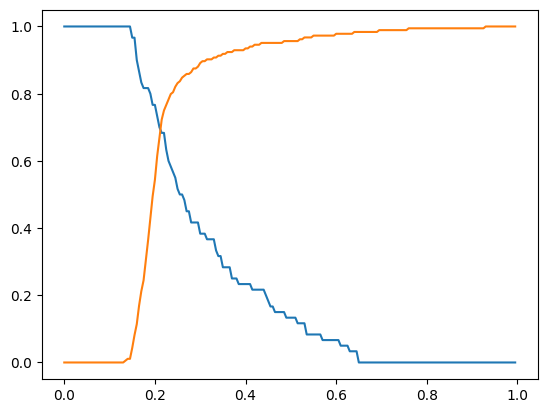

In [77]:
# Specificity and Sensitivity behaviour

thrs = np.arange(0, 1, 0.005)
plt.plot(thrs, Tpr)
plt.plot(thrs, 1 - Fpr)


### 4. 4 Confusion Matrix

The Confusion matrix is a table that is often used to describe the performance of a classification model.

We will use a function already defined in the sklearn library:

In [91]:
from sklearn.metrics import confusion_matrix

pred = predict(h(xTrain, w), 0.5)
cm = confusion_matrix(yTrain, pred)
print(cm)

[[176   8]
 [ 52   8]]


For plotting the Confusion Matrix we will use the next function:

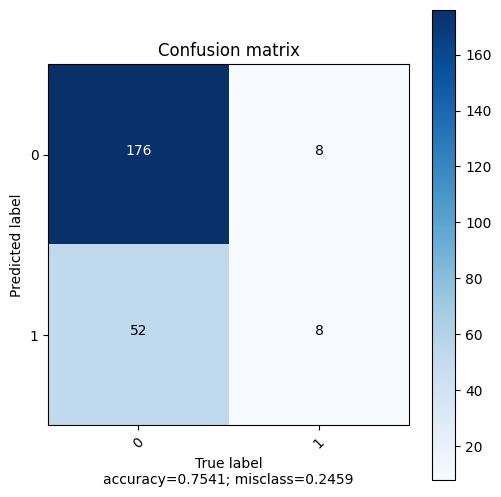

In [92]:
def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(5, 5))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
#Testing the function

plot_confusion_matrix(values = cm, classes = ['0', '1'])


## TAREA: Banknote dataset

Obtain the Accuracy, the Specificity and Sensitivity, the ROC Curve, AUC, and Confusion Matrix for the Banknote dataset.